# Chargement des données

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Universite/Project SD/donnees/merge.csv', sep=";")
data = data.replace('None', np.nan)
data.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,2022-360375,21/04/2022,1,Vente,260000.0,26.0,NaN,RUE DELILLE,582,76800,...,129.0,4.0,S,sols,NaN,NaN,351.0,1.071855,49.401886,000AB
1,2022-360375,21/04/2022,1,Vente,260000.0,26.0,NaN,RUE DELILLE,582,76800,...,NaN,0.0,S,sols,NaN,NaN,351.0,1.071855,49.401886,000AB
2,2021-1180016,10/05/2021,1,Vente,160000.0,13.0,NaN,RUE ALFRED DE MUSSET,40,76800,...,64.0,4.0,S,sols,NaN,NaN,452.0,1.070963,49.402764,000AB
3,2021-1177880,14/01/2021,1,Vente,174000.0,21.0,NaN,RUE PAUL VERLAINE,1920,76800,...,64.0,4.0,S,sols,NaN,NaN,498.0,1.070475,49.403622,000AB
4,2021-1177880,14/01/2021,1,Vente,174000.0,21.0,NaN,RUE PAUL VERLAINE,1920,76800,...,NaN,0.0,S,sols,NaN,NaN,498.0,1.070475,49.403622,000AB


# Analyse exploratoire des données

Afficher le nombre de données et de caractéristiques

In [ ]:
data.shape

(2972, 41)

Nous analysons la description de chaque caractéristique, dans laquelle nous pouvons obtenir le type de données et le nombre de valeurs nulles.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_mutation                   2972 non-null   object 
 1   date_mutation                 2972 non-null   object 
 2   numero_disposition            2972 non-null   int64  
 3   nature_mutation               2972 non-null   object 
 4   valeur_fonciere               2922 non-null   float64
 5   adresse_numero                2487 non-null   float64
 6   adresse_suffixe               117 non-null    object 
 7   adresse_nom_voie              2957 non-null   object 
 8   adresse_code_voie             2957 non-null   object 
 9   code_postal                   2957 non-null   object 
 10  code_commune                  2972 non-null   int64  
 11  nom_commune                   2972 non-null   object 
 12  code_departement              2972 non-null   int64  
 13  anc

In [ ]:
data.isnull().sum()

id_mutation                        0
date_mutation                      0
numero_disposition                 0
nature_mutation                    0
valeur_fonciere                   50
adresse_numero                   485
adresse_suffixe                 2855
adresse_nom_voie                  15
adresse_code_voie                 15
code_postal                       15
code_commune                       0
nom_commune                        0
code_departement                   0
ancien_code_commune             2972
ancien_nom_commune              2972
id_parcelle                        0
ancien_id_parcelle              2972
numero_volume                   2966
lot1_numero                     2525
lot1_surface_carrez             2808
lot2_numero                     2809
lot2_surface_carrez             2938
lot3_numero                     2910
lot3_surface_carrez             2962
lot4_numero                     2968
lot4_surface_carrez             2972
lot5_numero                     2968
l

Nous examinons les données et la quantité contenue dans chaque jour.

In [ ]:
print(data['code_type_local'].value_counts())
print(data['type_local'].value_counts())

1    1077
3     569
2     401
4     152
Name: code_type_local, dtype: int64
Maison                                      1077
Dépendance                                   569
Appartement                                  401
Local industriel. commercial ou assimilé     152
Name: type_local, dtype: int64


# Sélection des caractéristiques

A partir de l'analyse précédente des caractéristiques et des données, nous sélectionnons les plus importantes pour la préparation du modèle.

In [ ]:
array_delete = ['id_mutation', 'date_mutation', 'adresse_suffixe', 'code_postal', 'code_commune', 'nom_commune', 'code_departement', 'ancien_code_commune', 'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle', 'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero', 'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez', 'lot4_numero', 'lot4_surface_carrez', 'lot5_numero', 'lot5_surface_carrez', 'code_nature_culture_speciale', 'nature_culture_speciale', 'section_prefixe', 'numero_disposition', 'nature_mutation', 'adresse_numero', 'adresse_nom_voie', 'adresse_code_voie', 'nombre_lots', 'type_local', 'code_nature_culture', 'nature_culture', 'longitude','latitude']
longitude = data['longitude'].to_numpy()
latitude = data['latitude'].to_numpy()
data.drop(columns = array_delete, inplace = True)

In [ ]:
data

,valeur_fonciere,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain
0,260000.0,1,129.0,4.0,351.0
1,260000.0,3,NaN,0.0,351.0
2,160000.0,1,64.0,4.0,452.0
3,174000.0,1,64.0,4.0,498.0
4,174000.0,3,NaN,0.0,498.0
...,...,...,...,...,...
2967,56460.0,4,11002.0,0.0,29103.0
2968,1000000.0,2,87.0,3.0,3973.0
2969,1000000.0,4,1048.0,0.0,3973.0
2970,165600.0,NaN,NaN,NaN,1465.0


Nous vérifions si les colonnes que nous avons choisies ont des valeurs nulles et si c'est le cas, nous procédons à leur suppression.

In [ ]:
data.isnull().sum()

valeur_fonciere                50
code_type_local               773
surface_reelle_bati          1359
nombre_pieces_principales     775
surface_terrain               457
dtype: int64

In [ ]:
data_1 = data.copy()
data_1 = data_1.dropna()

In [ ]:
data_1['code_type_local'] = data_1['code_type_local'].astype('float64')
data_1

,valeur_fonciere,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain
0,260000.0,1.0,129.0,4.0,351.0
2,160000.0,1.0,64.0,4.0,452.0
3,174000.0,1.0,64.0,4.0,498.0
5,200000.0,2.0,18.0,1.0,105.0
6,200000.0,4.0,68.0,0.0,105.0
...,...,...,...,...,...
2966,56460.0,4.0,919.0,0.0,29103.0
2967,56460.0,4.0,11002.0,0.0,29103.0
2968,1000000.0,2.0,87.0,3.0,3973.0
2969,1000000.0,4.0,1048.0,0.0,3973.0


Nous vérifions si après le nettoyage il y a des valeurs nulles.

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1332 entries, 0 to 2971
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   valeur_fonciere            1332 non-null   float64
 1   code_type_local            1332 non-null   float64
 2   surface_reelle_bati        1332 non-null   float64
 3   nombre_pieces_principales  1332 non-null   float64
 4   surface_terrain            1332 non-null   float64
dtypes: float64(5)
memory usage: 62.4 KB


Nous montrons la corrélation des variables par rapport à la variable cible au moyen d'un nuage de points.

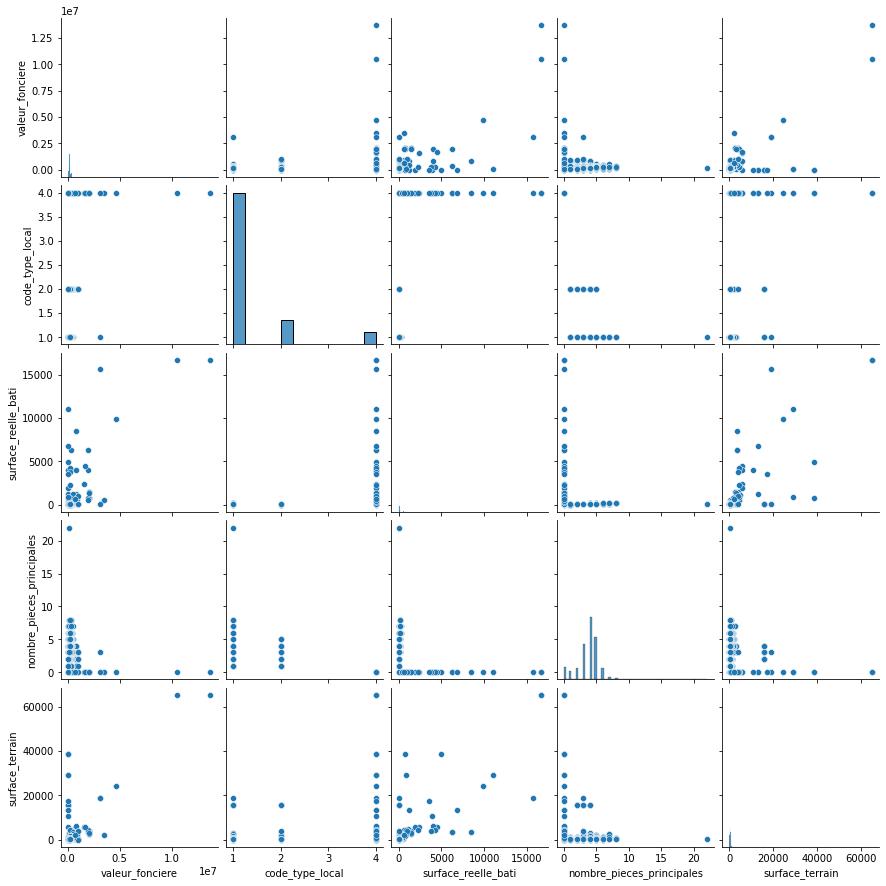

In [ ]:
sns.pairplot(data_1)

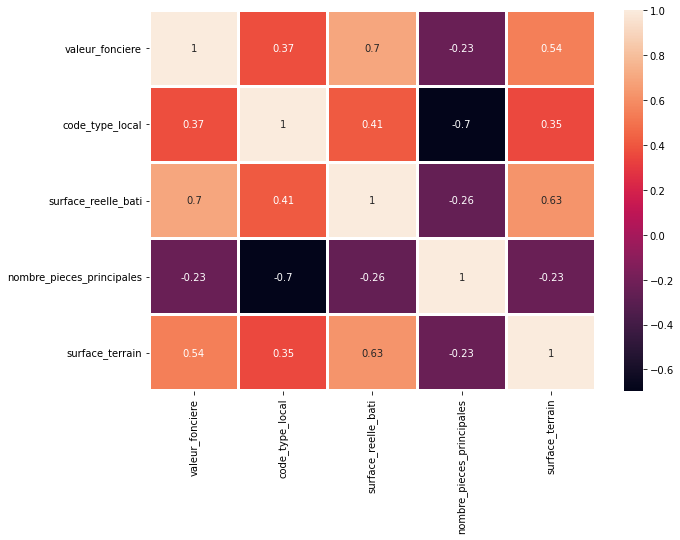

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data_1.corr(),annot=True,linewidths=2)

Nous pouvons également obtenir l'analyse statistique de chaque variable.

In [ ]:
features_ = ['code_type_local', 'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain']
data_1.describe()

,valeur_fonciere,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain
count,1.332000e+03,1332.000000,1332.000000,1332.000000,1332.000000
mean,2.536535e+05,1.327327,205.201201,3.716216,1214.577327
std,5.569614e+05,0.785521,1012.042427,1.659780,4182.077100
min,1.500000e-01,1.000000,8.000000,0.000000,14.000000
25%,1.242625e+05,1.000000,64.000000,3.000000,222.750000
50%,1.695250e+05,1.000000,80.000000,4.000000,385.000000
75%,2.260000e+05,1.000000,99.000000,5.000000,549.250000
max,1.372000e+07,4.000000,16673.000000,22.000000,65177.000000


# Analyse des valeurs aberrantes

Nous pouvons réaliser un box plot, qui nous montre la fourchette dans laquelle se trouvent nos informations pour chaque caractéristique.

1.0    1072
2.0     172
4.0      88
Name: code_type_local, dtype: int64


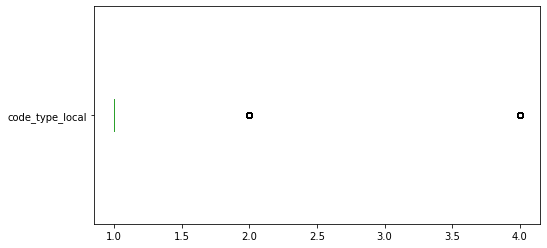

80.0      120
78.0       49
60.0       42
70.0       36
90.0       35
         ... 
154.0       1
319.0       1
424.0       1
1961.0      1
600.0       1
Name: surface_reelle_bati, Length: 201, dtype: int64


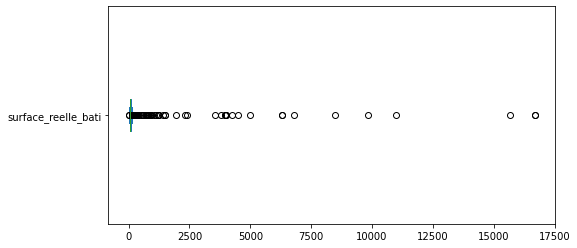

4.0     439
5.0     299
3.0     252
0.0      88
2.0      84
6.0      83
1.0      59
7.0      20
8.0       7
22.0      1
Name: nombre_pieces_principales, dtype: int64


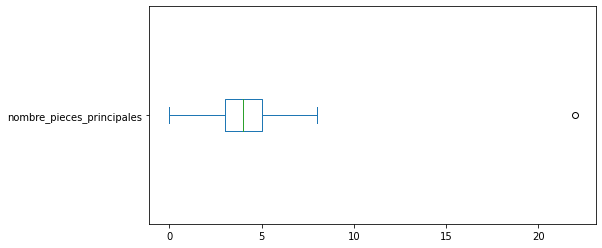

15640.0    37
223.0      25
500.0      21
245.0      15
458.0      15
           ..
646.0       1
427.0       1
331.0       1
468.0       1
2112.0      1
Name: surface_terrain, Length: 605, dtype: int64


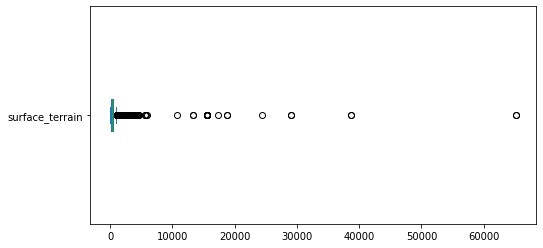

In [ ]:
for column in features_:
  print(data_1[column].value_counts())
  data_1[column].plot.box(figsize=(8,4), vert=False)
  plt.show()

Nous pouvons voir qu'il y a des valeurs en dehors de la plage de données qui peuvent affecter la précision de notre modèle.

## Élimination des valeurs aberrantes

In [ ]:
not_outliers = data_1.copy()

for column in features_:
  Q1 = not_outliers[column].quantile(0.25)
  Q3 = not_outliers[column].quantile(0.75)
  IQR = Q3 - Q1

  print('-------------',column,'---------------')
  print('Q1:', Q1, 'Q2:', Q3, 'IQR',IQR)

  upper = Q3+1.5*IQR
  lower = Q1-1.5*IQR
  
  position = (not_outliers[column] < lower) | (not_outliers[column] > upper)
  otuliers = not_outliers[position]

  position_not_outliers = (not_outliers[column] >= lower) & (not_outliers[column] <= upper)
  not_outliers = not_outliers[position_not_outliers]
  print(not_outliers[column], len(otuliers))

------------- code_type_local ---------------
Q1: 1.0 Q2: 1.0 IQR 0.0
0       1.0
2       1.0
3       1.0
7       1.0
8       1.0
       ... 
2946    1.0
2948    1.0
2949    1.0
2950    1.0
2951    1.0
Name: code_type_local, Length: 1072, dtype: float64 260
------------- surface_reelle_bati ---------------
Q1: 68.0 Q2: 99.0 IQR 31.0
0       129.0
2        64.0
3        64.0
7       108.0
8        74.0
        ...  
2945     97.0
2948     74.0
2949    102.0
2950     64.0
2951     80.0
Name: surface_reelle_bati, Length: 1020, dtype: float64 52
------------- nombre_pieces_principales ---------------
Q1: 3.75 Q2: 5.0 IQR 1.25
0       4.0
2       4.0
3       4.0
7       5.0
8       5.0
       ... 
2945    5.0
2948    5.0
2949    5.0
2950    4.0
2951    4.0
Name: nombre_pieces_principales, Length: 996, dtype: float64 24
------------- surface_terrain ---------------
Q1: 200.0 Q2: 490.25 IQR 290.25
0       351.0
2       452.0
3       498.0
7       348.0
8       377.0
        ...  
2945    406.

Après le nettoyage des valeurs aberrantes, nous montrons à nouveau la corrélation des variables par rapport à la variable cible au moyen d'un diagramme de dispersion.

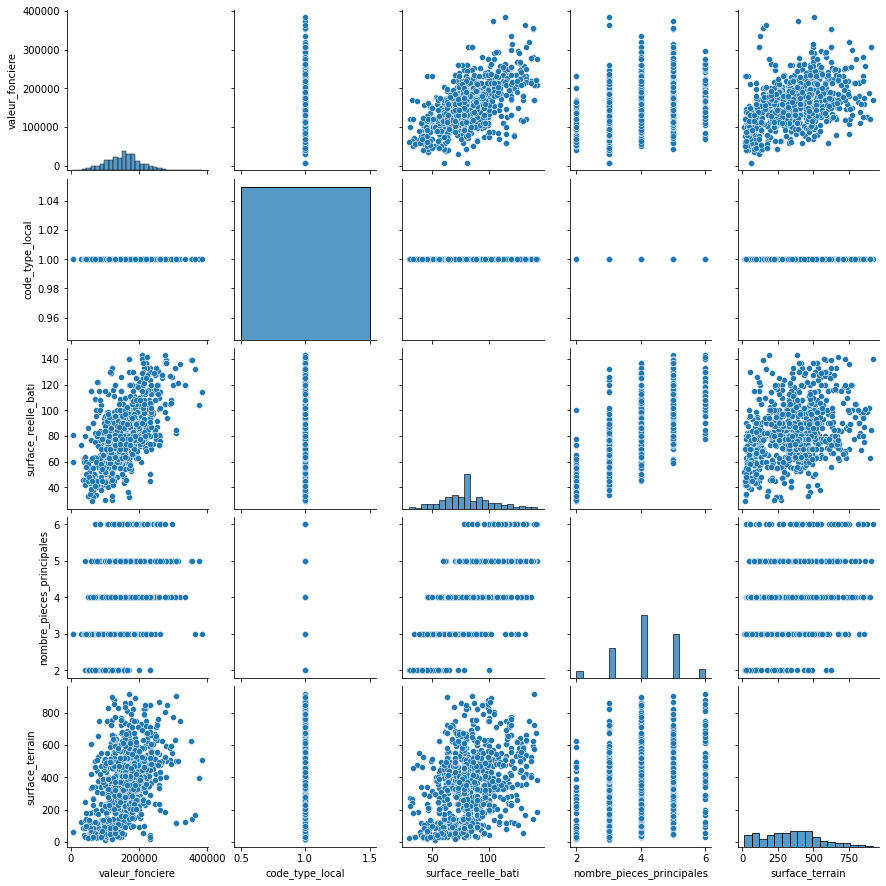

In [ ]:
sns.pairplot(not_outliers)

1.0    963
Name: code_type_local, dtype: int64


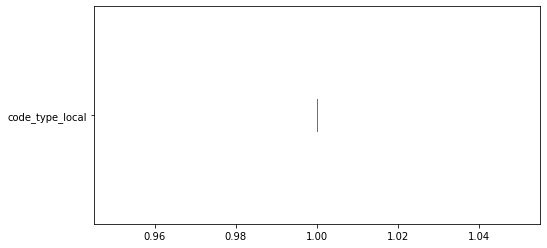

80.0     111
78.0      39
90.0      34
70.0      32
60.0      24
        ... 
34.0       1
37.0       1
131.0      1
127.0      1
41.0       1
Name: surface_reelle_bati, Length: 108, dtype: int64


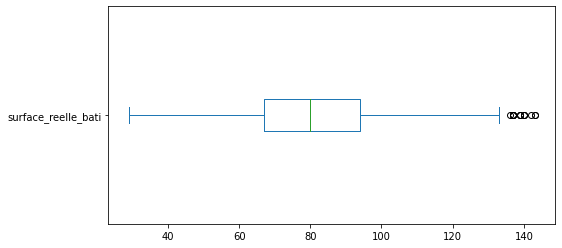

4.0    397
5.0    276
3.0    189
6.0     57
2.0     44
Name: nombre_pieces_principales, dtype: int64


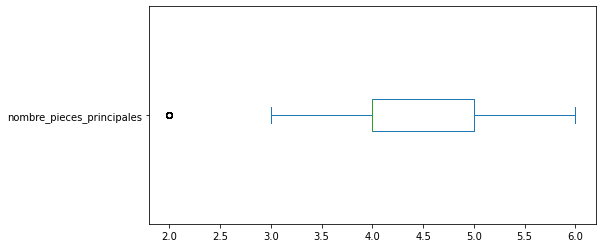

95.0     10
243.0     9
473.0     7
245.0     7
117.0     6
         ..
512.0     1
192.0     1
672.0     1
397.0     1
613.0     1
Name: surface_terrain, Length: 509, dtype: int64


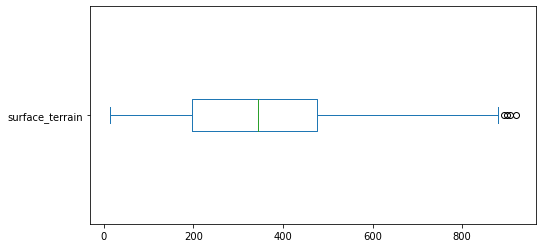

In [ ]:
for column in features_:
  print(not_outliers[column].value_counts())
  not_outliers[column].plot.box(figsize=(8,4), vert=False)
  plt.show()

# Modèle

Nous sélectionnons nos données dépendantes et indépendantes dans X, y

In [ ]:
X = data_1[features_]
y = data_1["valeur_fonciere"]

Nous avons divisé les données en groupes de formation et de test pour la validation croisée.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18) #3

print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (999, 4)
X_test: (333, 4)
y_train: (999,)
y_test: (333,)


## Régression linéaire

### Entraînement du modèle

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

lm = LinearRegression(fit_intercept=False)
lm.fit(X_train,y_train)

cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
cdf

,Coefficients
code_type_local,70134.638805
surface_reelle_bati,378.173982
nombre_pieces_principales,14557.485593
surface_terrain,27.050549


In [ ]:
n = X_train.shape[0]
k = X_train.shape[1]
dfN = n-k

train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0]
for i in range(k):
  r = (sum_error/dfN)
  r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
  se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
code_type_local,70134.638805,15685.620306,4.471270
surface_reelle_bati,378.173982,12.357663,30.602385
nombre_pieces_principales,14557.485593,7694.147904,1.892021
surface_terrain,27.050549,2.890830,9.357363


In [ ]:
print("\n Valeur R-carré train:",round(metrics.r2_score(y_train,train_pred),3))


 Valeur R-carré train: 0.605


### Prédiction

Valeur R-carré prédite: -0.829


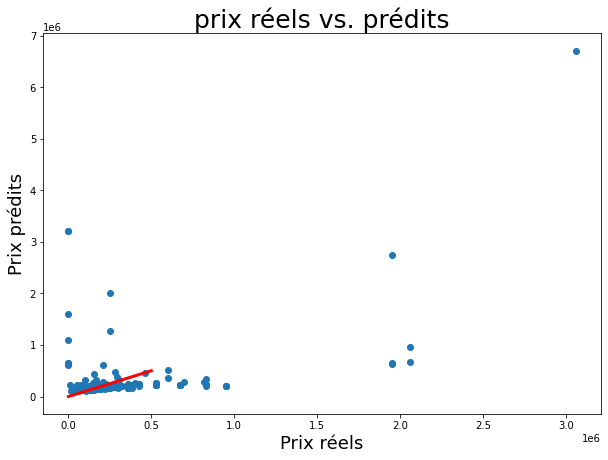

In [ ]:

predictions = lm.predict(X_test)
print("Valeur R-carré prédite:",round(metrics.r2_score(y_test,predictions),3))

plt.figure(figsize=(10,7))
plt.title("prix réels vs. prédits",fontsize=25)
plt.xlabel("Prix réels",fontsize=18)
plt.ylabel("Prix prédits", fontsize=18)
plt.scatter(x=y_test,y=predictions)
plt.plot([y.min(), 0.5*1e6], [y.min(), 0.5*1e6], color='red',lw=3)

In [ ]:
prueba = lm.predict([[1,83,4,483]])
print(np.round(prueba, 3))

[172818.437]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# ONNX

Nous exportons le modèle en utilisant la bibliothèque ONNX pour le lier à l'application.

In [ ]:
pip install skl2onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [ ]:
pip install onnxruntime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 6.3 MB/s eta 0:00:00


In [ ]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Specify an initial type for the model ( similar to input shape for the model )
initial_type = [ 
    ( 'x_new' , FloatTensorType( [1,4] ) )
]

# Write the ONNX model to disk
converted_model = convert_sklearn( lm , initial_types=initial_type )
with open( "model_immobiliere.onnx", "wb" ) as f:
    f.write( converted_model.SerializeToString() )

In [ ]:
!python -m onnxruntime.tools.convert_onnx_models_to_ort /content/model_immobiliere.onnx

Converting models with optimization style 'Fixed' and level 'all'
Converting optimized ONNX model /content/model_immobiliere.onnx to ORT format model /content/model_immobiliere.ort
Converted 1/1 models successfully.
Generating config file from ORT format models with optimization style 'Fixed' and level 'all'
2023-01-06 17:36:17,982 ort_format_model.utils [INFO] - Created config in /content/model_immobiliere.required_operators.config
Converting models with optimization style 'Runtime' and level 'all'
Converting optimized ONNX model /content/model_immobiliere.onnx to ORT format model /content/model_immobiliere.with_runtime_opt.ort
Converted 1/1 models successfully.
Converting models again without runtime optimizations to generate a complete config file. These converted models are temporary and will be deleted.
Converting optimized ONNX model /content/model_immobiliere.onnx to ORT format model /content/tmpxwl89jvd.without_runtime_opt/model_immobiliere.ort
Converted 1/1 models successfully